# Create a plot of Idaho Confirmed COVID-19 Cases

### 1. Load the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Get the range of dates and location of the data to munge

In [2]:
covid_daily_reports = 'csse_covid_19_data/csse_covid_19_daily_reports/'

# Population density (people / km^2) obtained from: 
# https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population_density
popDens_ID = 7.0
popDens_CO = 20.0
popDens_UT = 14.0
popDens_OR = 16.0
popDens_NV = 10.0
popDens_WA = 41.0

day_shift=0

nState = 6

id_firstday = '3/13/2020'
co_firstday = '3/06/2020'
ut_firstday = '3/07/2020'
or_firstday = '2/29/2020'
nv_firstday = '3/05/2020'
wa_firstday = '2/28/2020'

today = pd.datetime.strftime(pd.datetime.now() - pd.Timedelta(days=day_shift), '%m-%d-%Y')

id_date_range = pd.date_range(start=id_firstday, end=today)
co_date_range = pd.date_range(start=co_firstday, end=today)
ut_date_range = pd.date_range(start=ut_firstday, end=today)
or_date_range = pd.date_range(start=or_firstday, end=today)
nv_date_range = pd.date_range(start=nv_firstday, end=today)
wa_date_range = pd.date_range(start=wa_firstday, end=today)

### 3. Create arrays for numbers of confirmed and recovered cases, and deaths

In [3]:
for state in np.arange(nState):
    if state == 0:
        date_range = id_date_range
        state_tag = "Idaho"
    elif state == 1:
        date_range = co_date_range
        state_tag = "Colorado"
    elif state == 2:
        date_range = ut_date_range
        state_tag = "Utah"
    elif state == 3:
        date_range = or_date_range
        state_tag = "Oregon"
    elif state == 4:
        date_range = nv_date_range
        state_tag = "Nevada"
    elif state == 5:
        date_range = wa_date_range
        state_tag = "Washington"

    day = 0

    confirmed = np.zeros((date_range.size,1))
    deaths    = np.zeros((date_range.size,1))
    recovered = np.zeros((date_range.size,1))
    active    = np.zeros((date_range.size,1))
    
    for date in date_range:
        
        covid_daily_data = pd.read_csv(covid_daily_reports+date.strftime('%m-%d-%Y') + '.csv')
        # Note the daily reports changed from 3/22/2020 onward such that the Province or State label was 
        # Provice_State rather than Province/State. Hence the branch below.
        if date <= pd.to_datetime('03-21-2020'):
            PS_label = "Province/State"
        elif date > pd.to_datetime('03-21-2020'):
            PS_label = "Province_State"

        covid_state_daily = covid_daily_data.loc[covid_daily_data[PS_label]==state_tag]
                
        confirmed[day] = covid_state_daily["Confirmed"].sum()
        deaths[day]    = covid_state_daily["Deaths"].sum()
        recovered[day] = covid_state_daily["Recovered"].sum()

        if(state == 1):
            confirmed[day] += covid_daily_data[covid_daily_data[PS_label].str.contains(', CO',na=False)]['Confirmed'].sum()
        elif(state == 2):
            confirmed[day] += covid_daily_data[covid_daily_data[PS_label].str.contains(', UT',na=False)]['Confirmed'].sum()
        elif(state == 3):
            confirmed[day] += covid_daily_data[covid_daily_data[PS_label].str.contains(', OR',na=False)]['Confirmed'].sum()
        elif(state == 4):
            confirmed[day] += covid_daily_data[covid_daily_data[PS_label].str.contains(', NV',na=False)]['Confirmed'].sum()
        elif(state == 5):
            confirmed[day] += covid_daily_data[covid_daily_data[PS_label].str.contains(', WA',na=False)]['Confirmed'].sum()
        
        day = day + 1        

    if state == 0:
        ID_confirmed = confirmed 
        ID_deaths    = deaths
        ID_recovered = recovered
    elif state == 1:
        CO_confirmed = confirmed
        CO_deaths    = deaths
        CO_recovered = recovered
    elif state == 2:
        UT_confirmed = confirmed
        UT_deaths    = deaths
        UT_recovered = recovered
    elif state == 3:
        OR_confirmed = confirmed
        OR_deaths    = deaths
        OR_recovered = recovered
    elif state == 4:
        NV_confirmed = confirmed
        NV_deaths    = deaths
        NV_recovered = recovered
    elif state == 5:
        WA_confirmed = confirmed
        WA_deaths    = deaths
        WA_recovered = recovered

### 4. Create a plot of the time series of data and save it

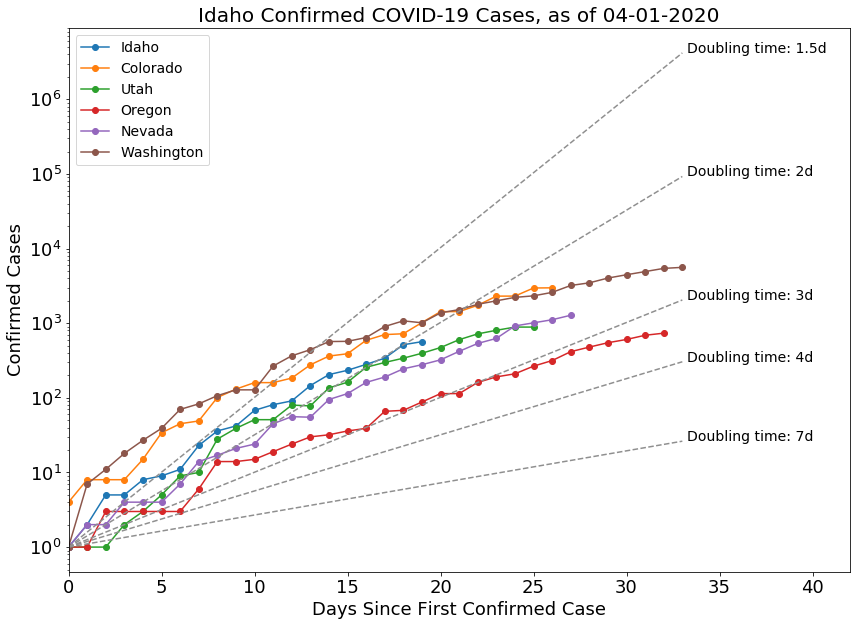

In [4]:
id_days_since_first = np.arange(id_date_range.size)
co_days_since_first = np.arange(co_date_range.size)
ut_days_since_first = np.arange(ut_date_range.size)
or_days_since_first = np.arange(or_date_range.size)
nv_days_since_first = np.arange(nv_date_range.size)
wa_days_since_first = np.arange(wa_date_range.size)

days_since_first = wa_days_since_first

dt_1p5day = 2.0 ** (days_since_first / 1.5)
dt_2day = 2.0 ** (days_since_first / 2.0)
dt_3day = 2.0 ** (days_since_first / 3.0)
dt_4day = 2.0 ** (days_since_first / 4.0)
dt_7day = 2.0 ** (days_since_first / 7.0)

fig = plt.figure(figsize=(14,10))
plt.plot(id_days_since_first,ID_confirmed,'o-',label="Idaho")
plt.plot(co_days_since_first,CO_confirmed,'o-',label="Colorado")
plt.plot(ut_days_since_first,UT_confirmed,'o-',label="Utah")
plt.plot(or_days_since_first,OR_confirmed,'o-',label="Oregon")
plt.plot(nv_days_since_first,NV_confirmed,'o-',label="Nevada")
plt.plot(wa_days_since_first,WA_confirmed,'o-',label="Washington")

plt.plot(days_since_first,dt_1p5day,'--',color='#8f8f8f')
plt.text(days_since_first[-1]+0.25,dt_1p5day[-1],'Doubling time: 1.5d',fontsize=14)

plt.plot(days_since_first,dt_2day,'--',color='#8f8f8f')
plt.text(days_since_first[-1]+0.25,dt_2day[-1],'Doubling time: 2d',fontsize=14)

plt.plot(days_since_first,dt_3day,'--',color='#8f8f8f')
plt.text(days_since_first[-1]+0.25,dt_3day[-1],'Doubling time: 3d',fontsize=14)

plt.plot(days_since_first,dt_4day,'--',color='#8f8f8f')
plt.text(days_since_first[-1]+0.25,dt_4day[-1],'Doubling time: 4d',fontsize=14)

plt.plot(days_since_first,dt_7day,'--',color='#8f8f8f')
plt.text(days_since_first[-1]+0.25,dt_7day[-1],'Doubling time: 7d',fontsize=14)

plt.xlim((0,date_range.size+np.round(date_range.size/4.0)))

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='upper left',fontsize=14)
plt.title('Idaho Confirmed COVID-19 Cases, as of '+date_range[-1].strftime('%m-%d-%Y'),fontsize=20)
plt.xlabel('Days Since First Confirmed Case',fontsize=18)
plt.ylabel('Confirmed Cases',fontsize=18)
plt.yscale('log')

fig.savefig('ID-COVID-19_'+date_range[-1].strftime('%m-%d-%Y')+'.png', facecolor=fig.get_facecolor(), edgecolor='none')


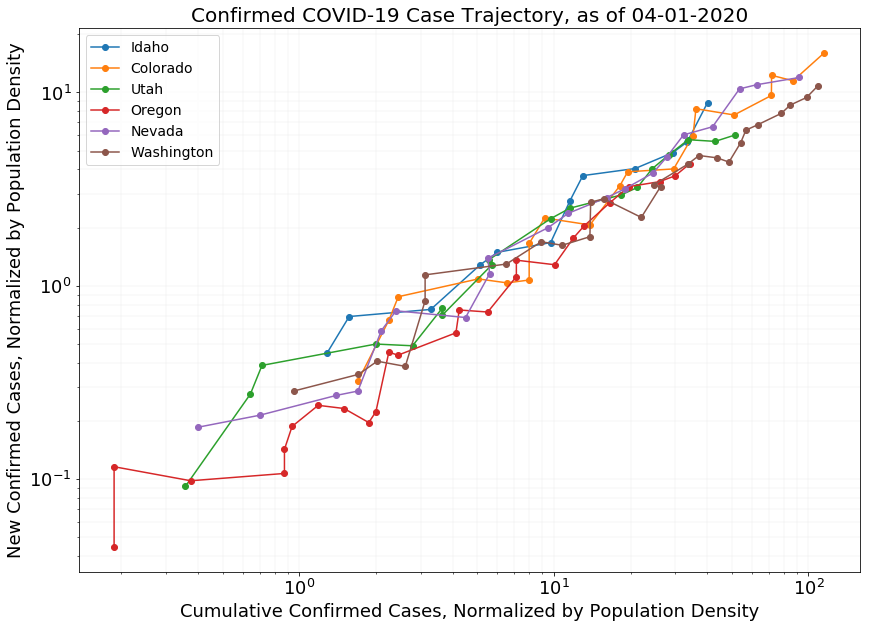

In [5]:
window = 7

def movingaverage(values, window):
    weights = np.repeat(1.0, window) / window
    sma = np.convolve(values, weights, 'valid')
    return sma

normCaseID = ID_confirmed[0:-2] / popDens_ID
normCaseCO = CO_confirmed[0:-2] / popDens_CO
normCaseUT = UT_confirmed[0:-2] / popDens_UT
normCaseOR = OR_confirmed[0:-2] / popDens_OR
normCaseNV = NV_confirmed[0:-2] / popDens_NV
normCaseWA = WA_confirmed[0:-2] / popDens_WA

normNewCaseID = (ID_confirmed[1:-1] - ID_confirmed[0:-2]) / popDens_ID
normNewCaseCO = (CO_confirmed[1:-1] - CO_confirmed[0:-2]) / popDens_CO
normNewCaseUT = (UT_confirmed[1:-1] - UT_confirmed[0:-2]) / popDens_UT
normNewCaseOR = (OR_confirmed[1:-1] - OR_confirmed[0:-2]) / popDens_OR
normNewCaseNV = (NV_confirmed[1:-1] - NV_confirmed[0:-2]) / popDens_NV
normNewCaseWA = (WA_confirmed[1:-1] - WA_confirmed[0:-2]) / popDens_WA

fig = plt.figure(figsize=(14,10))
plt.plot(normCaseID[(window-2):-1],movingaverage(normNewCaseID.flatten(),window),'o-',label="Idaho")
plt.plot(normCaseCO[(window-2):-1],movingaverage(normNewCaseCO.flatten(),window),'o-',label="Colorado")
plt.plot(normCaseUT[(window-2):-1],movingaverage(normNewCaseUT.flatten(),window),'o-',label="Utah")
plt.plot(normCaseOR[(window-2):-1],movingaverage(normNewCaseOR.flatten(),window),'o-',label="Oregon")
plt.plot(normCaseNV[(window-2):-1],movingaverage(normNewCaseNV.flatten(),window),'o-',label="Nevada")
plt.plot(normCaseWA[(window-2):-1],movingaverage(normNewCaseWA.flatten(),window),'o-',label="Washington")

plt.title('Confirmed COVID-19 Case Trajectory, as of '+date_range[-1].strftime('%m-%d-%Y'),fontsize=20)
plt.xlabel('Cumulative Confirmed Cases, Normalized by Population Density',fontsize=18)
plt.ylabel('New Confirmed Cases, Normalized by Population Density',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=14)
plt.grid(which='both',linewidth=0.1)

fig.savefig('ID-COVID-19_case_trajectory_'+date_range[-1].strftime('%m-%d-%Y')+'.png', facecolor=fig.get_facecolor(), edgecolor='none')

In [6]:
dfID = pd.DataFrame({'ID': ID_confirmed.flatten()},dtype=int)
dfUT = pd.DataFrame({'UT': UT_confirmed.flatten()},dtype=int)
dfCO = pd.DataFrame({'CO': CO_confirmed.flatten()},dtype=int)
dfOR = pd.DataFrame({'OR': OR_confirmed.flatten()},dtype=int)
dfNV = pd.DataFrame({'NV': NV_confirmed.flatten()},dtype=int)
dfWA = pd.DataFrame({'WA': WA_confirmed.flatten()},dtype=int)

df_case = pd.concat([dfID,dfUT,dfCO,dfNV,dfOR,dfWA], axis=1)
df_case = df_case.replace(np.nan, '')

df_case

,ID,UT,CO,NV,OR,WA
0,1,1,4,1,1,1
1,2,1,8,2,1,7
2,5,1,8,2,3,11
3,5,2,8,4,3,18
4,8,3,15,4,3,27
5,9,5,34,4,3,39
6,11,9,45,7,3,70
7,23,10,49,14,6,83
8,36,28,101,17,14,107
9,42,39,131,21,14,128
